In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://www.studyai.cn/modules/generated/sklearn.metrics.davies_bouldin_score.html

In [22]:
from sklearn.datasets import make_blobs

# Create dataset
X, y = make_blobs(
    n_samples=150, n_features=2,
    centers=3, cluster_std=0.5, 
    shuffle=True, random_state=0
)

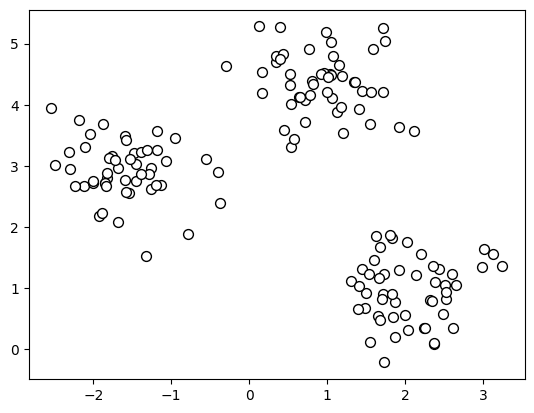

In [24]:
plt.scatter(
    X[:, 0], X[:, 1],
    c='white', marker='o',
    edgecolor='black', s=50
)
plt.show()

### Convertendo em DataFrame

In [25]:
cluster_df = pd.DataFrame(X, columns=['X', 'y'])

In [26]:
cluster_df

,X,y
0,2.605097,1.225296
1,0.532377,3.313389
2,0.802314,4.381962
3,0.528537,4.497239
4,2.618585,0.357698
...,...,...
145,-2.238934,2.671222
146,-1.872929,3.686071
147,-1.889703,2.226200
148,2.253271,0.351133


### Davies-Bouldin Score

In [31]:
def get_kmeans_score(data, center):
    kmeans = KMeans(n_clusters=center, init='k-means++', n_init=10)
    model = kmeans.fit_predict(data)

    score = davies_bouldin_score(data, model)

    return score

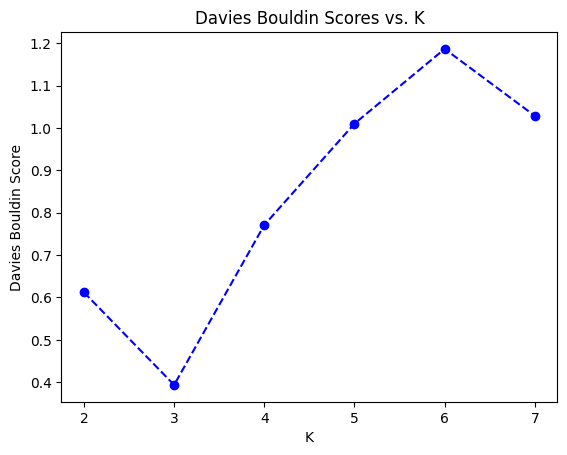

In [32]:
scores = []
centers = list(range(2,8))
for center in centers:
    scores.append(get_kmeans_score(cluster_df, center))

plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin Score');
plt.title('Davies Bouldin Scores vs. K');